<a href="https://colab.research.google.com/github/Mritunjaysri01/Career-Launcher-ML-Intern/blob/master/Module6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
import glob
import os
from statsmodels.sandbox.regression.predstd import wls_prediction_std
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


query 6.1

In [4]:
dir='' #location of file
csvfiles = glob.glob(os.path.join(dir, '*.csv'))
df=pd.DataFrame()

In [5]:
for csvfile in csvfiles:
    df2=pd.read_csv(csvfile)
    df2=df2[df2.Series == 'EQ']
    df[os.path.basename(csvfile).split('.')[0]]=df2['Close Price']

In [6]:
df

,IRCON,WELSPUNIND,PVR,LAXMIMACH,JETAIRWAYS,BAJAJELEC,VOLTAS,MINDAIND,JKLAKSHMI,ASHOKA,LEMONTREE,LUXIND,RAYMOND,CENTURYPLY,FORTIS,VIPIND,SUNTV,RELINFRA,IDFC,SONATSOFTW,SUZLON,PNB,GUJALKALI,RCOM,ITDC,VENKEYS,NCC,LALPATHLAB,BOMDYEING
0,415.30,90.25,1524.95,4614.05,527.50,341.15,431.85,517.90,510.80,216.05,71.65,819.60,772.80,266.65,205.25,199.20,912.20,605.40,63.70,162.65,19.60,166.80,457.35,32.00,650.15,1169.70,97.35,900.60,82.20
1,427.00,90.65,1539.00,4589.80,534.15,347.00,432.45,545.60,527.50,214.90,66.85,817.50,785.00,266.10,207.90,200.90,894.70,611.05,64.25,158.60,19.70,174.15,455.25,32.10,636.70,1177.00,100.40,910.95,83.40
2,421.40,88.85,1530.30,4637.25,528.90,349.85,430.20,560.10,516.20,217.00,66.95,819.80,783.65,264.85,205.90,199.65,887.05,605.25,63.35,158.25,19.90,165.05,472.65,31.95,626.75,1188.00,101.45,911.70,82.25
3,407.10,86.90,1515.05,4544.45,522.70,334.10,414.10,545.25,478.95,209.65,66.40,820.05,746.95,260.35,196.85,193.30,871.35,578.65,61.50,157.40,20.00,158.50,461.85,31.05,604.65,1156.90,97.00,909.75,78.95
4,399.80,85.05,1513.55,4522.70,520.40,336.20,415.75,560.80,469.55,206.25,67.70,817.80,723.10,254.05,203.55,195.95,852.40,569.55,61.15,151.90,20.60,155.20,455.35,30.55,594.30,1161.65,95.45,910.25,77.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,398.20,70.00,1307.60,5861.95,677.70,480.00,629.35,1133.95,411.55,241.20,69.75,1503.50,978.00,333.95,138.70,342.55,891.55,450.20,59.75,236.40,13.80,173.70,730.85,11.65,510.85,2749.05,122.75,881.70,234.60
147,394.30,68.75,1302.10,5802.20,677.60,467.20,619.60,1127.15,429.35,235.60,69.60,1508.00,972.40,326.60,128.00,340.45,916.25,450.35,58.75,234.30,13.60,167.80,709.65,11.30,504.45,2823.20,125.05,885.00,233.70
148,399.95,68.40,1298.60,5801.15,675.50,451.30,616.95,1114.00,440.35,232.25,69.40,1499.15,973.10,322.20,130.50,337.70,913.00,454.45,57.80,231.10,13.30,169.60,694.95,11.90,499.25,2833.65,122.95,888.70,228.30
149,395.45,69.00,1303.85,5834.35,703.05,467.85,631.55,1104.85,438.60,237.95,71.95,1509.00,976.80,336.75,135.15,346.30,934.50,448.85,57.30,231.25,13.50,171.60,735.70,11.85,510.90,2840.15,120.65,889.00,266.75


Query 6.2

In [7]:
df2=pd.DataFrame()
df2['Annual_return']=np.mean(df.pct_change()) * 252
df2['Annual_volatility']=np.std(df.pct_change()) * np.sqrt(252)

In [8]:
df2.iloc[:,0:2]

,Annual_return,Annual_volatility
IRCON,-0.079240,0.300511
WELSPUNIND,-0.360329,0.381576
PVR,-0.183927,0.284657
LAXMIMACH,0.414874,0.254521
JETAIRWAYS,0.548230,0.420122
BAJAJELEC,0.646189,0.408029
VOLTAS,0.688500,0.333740
MINDAIND,1.386784,0.345105
JKLAKSHMI,-0.242744,0.267535
ASHOKA,0.247757,0.360302


Query 6.3

In [9]:
X=df2.iloc[:,0:2].values

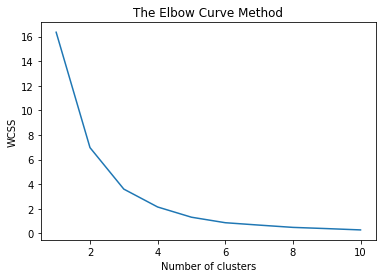

In [10]:
#Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append (kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Curve Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans=kmeans.fit_predict(X)

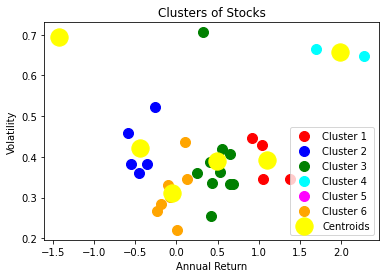

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s= 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s= 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s= 100, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Stocks')
plt.xlabel('Annual Return')
plt.ylabel('Volatility')
plt.legend()
plt.rcParams["figure.figsize"] = [20,15]
plt.show()

Query 6.4

In [13]:
Cluster=pd.DataFrame(index=df2.index)
Cluster['cluster']=y_kmeans
Cluster=Cluster.groupby(Cluster['cluster'])
for key, item in Cluster:
    print(Cluster.get_group(key), "\n\n")

           cluster
MINDAIND         0
LUXIND           0
VIPIND           0
GUJALKALI        0 


            cluster
WELSPUNIND        1
FORTIS            1
RELINFRA          1
SUZLON            1
ITDC              1 


            cluster
LAXMIMACH         2
JETAIRWAYS        2
BAJAJELEC         2
VOLTAS            2
ASHOKA            2
RAYMOND           2
CENTURYPLY        2
SONATSOFTW        2
PNB               2
NCC               2 


           cluster
VENKEYS          3
BOMDYEING        3 


      cluster
RCOM        4 


            cluster
IRCON             5
PVR               5
JKLAKSHMI         5
LEMONTREE         5
SUNTV             5
IDFC              5
LALPATHLAB        5 


